In [53]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [54]:
amazon_monthly_csv_path = '/Users/surya/Desktop/FE-511/FE511/Final PRoject/amazon_monthly.csv'
sp500_monthly_csv_path = '/Users/surya/Desktop/FE-511/FE511/Final PRoject/S&P500_monthly.csv'
amazon_daily_csv_path = '/Users/surya/Desktop/FE-511/FE511/Final PRoject/amzn_daily_wallstreet_HistoricalPrices.csv'
sp500_daily_csv_path = '/Users/surya/Desktop/FE-511/FE511/Final PRoject/S&P_daily_wallstreet_HistoricalPrices.csv'

## Finding correlation using monthly data

In [55]:
# Reading monthly data from CSV files
amazon_monthly = pd.read_csv(amazon_monthly_csv_path, parse_dates=['date'])
sp500_monthly = pd.read_csv(sp500_monthly_csv_path, parse_dates=['datadate'])

In [56]:
amazon_monthly = amazon_monthly.dropna()
sp500_monthly = sp500_monthly.dropna()

In [57]:
# amazon_monthly = pd.DataFrame(amazon_monthly)
# print(amazon_monthly)
amazon_monthly.head(10)

,PERMNO,date,COMNAM,PRC
0,84788,2018-01-31,AMAZON COM INC,1450.89001
1,84788,2018-02-28,AMAZON COM INC,1512.44995
2,84788,2018-03-29,AMAZON COM INC,1447.33997
3,84788,2018-04-30,AMAZON COM INC,1566.13000
4,84788,2018-05-31,AMAZON COM INC,1629.62000
5,84788,2018-06-29,AMAZON COM INC,1699.80005
6,84788,2018-07-31,AMAZON COM INC,1777.43994
7,84788,2018-08-31,AMAZON COM INC,2012.70996
8,84788,2018-09-28,AMAZON COM INC,2003.00000
9,84788,2018-10-31,AMAZON COM INC,1598.01001


In [58]:
amazon_monthly.isnull().any()
sp500_monthly.isnull().any()

gvkeyx      False
prccm       False
datadate    False
conm        False
tic         False
dtype: bool

## Pearson Correlation

In [59]:
# Correlation for monthly data
monthly_correlation = pearsonr(amazon_monthly['PRC'], sp500_monthly['prccm'])[0]
print(f"Monthly Correlation: {monthly_correlation:.4f}")

Monthly Correlation: 0.3881


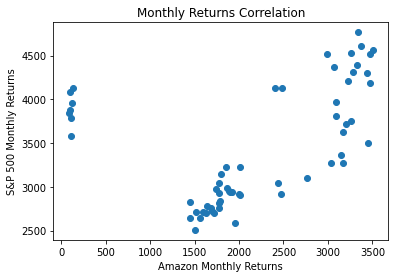

In [60]:
# Plot monthly returns
plt.scatter(amazon_monthly['PRC'], sp500_monthly['prccm'])
plt.title('Monthly Returns Correlation')
plt.xlabel('Amazon Monthly Returns')
plt.ylabel('S&P 500 Monthly Returns')
plt.show()

In [61]:
# Reading daily data from CSV files
amazon_daily = pd.read_csv(amazon_daily_csv_path, parse_dates=['Date'])
sp500_daily = pd.read_csv(sp500_daily_csv_path, parse_dates=['Date'])

/var/folders/13/vzz1wpdx7v71md6284hwnky40000gn/T/ipykernel_24461/1139253460.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  amazon_daily = pd.read_csv(amazon_daily_csv_path, parse_dates=['Date'])
/var/folders/13/vzz1wpdx7v71md6284hwnky40000gn/T/ipykernel_24461/1139253460.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_daily = pd.read_csv(sp500_daily_csv_path, parse_dates=['Date'])


In [62]:
# Drop NaN values
amazon_daily = amazon_daily.dropna()
sp500_daily = sp500_daily.dropna()

In [63]:
amazon_daily.isnull().any()

Date       False
 Open      False
 High      False
 Low       False
 Close     False
 Volume    False
dtype: bool

In [64]:
sp500_daily.isnull().any()

Date      False
 Open     False
 High     False
 Low      False
 Close    False
dtype: bool

## Linear Regression

Mean Squared Error for Linear Regression: 1180814.5954063812


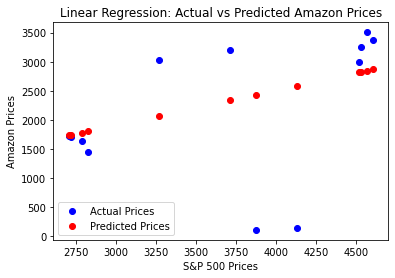

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming amazon_monthly and sp500_monthly have 'returns' columns for monthly returns
X = sp500_monthly[['prccm']].values  # S&P 500 prices as independent variable
y = amazon_monthly['PRC'].values    # Amazon prices as dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Predict Amazon prices on the test set
y_pred_lr = model.predict(X_test)

# Calculate the mean squared error on the test set
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error for Linear Regression:", mse_lr)

# Optional: Plot actual vs. predicted prices for visual inspection
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.scatter(X_test, y_pred_lr, color='red', label='Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Amazon Prices')
plt.xlabel('S&P 500 Prices')
plt.ylabel('Amazon Prices')
plt.legend()
plt.show()

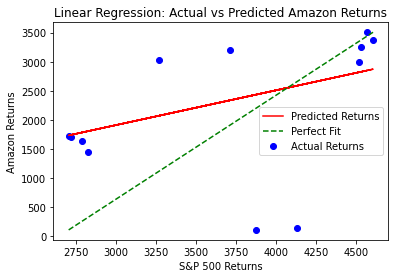

In [66]:
plt.scatter(X_test, y_test, color='blue', label='Actual Returns')  # Actual data points
plt.plot(X_test, y_pred_lr, color='red', label='Predicted Returns')  # Regression line

# Additionally, plot a line of perfect predictions for reference
# It will help to visually assess the accuracy of the model
plt.plot([min(X_test), max(X_test)], [min(y_test), max(y_test)], color='green', linestyle='--', label='Perfect Fit')

plt.xlabel('S&P 500 Returns')
plt.ylabel('Amazon Returns')
plt.title('Linear Regression: Actual vs Predicted Amazon Returns')
plt.legend()
plt.show()

## Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_model.predict(X_test)

In [70]:
# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 471566.74278984143


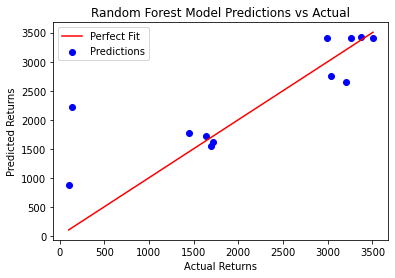

In [71]:
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit')
plt.xlabel('Actual Returns')
plt.ylabel('Predicted Returns')
plt.title('Random Forest Model Predictions vs Actual')
plt.legend()
plt.show()

## Time Series Analysis on Daily Closing Data

In [72]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from sklearn.metrics import mean_squared_error

# # Read the CSV files
# amazon_daily = pd.read_csv('/Users/surya/Desktop/FE-511/FE511/Final PRoject/amzn_daily_wallstreet_HistoricalPrices.csv', parse_dates=['Date'], index_col='Date')
# sp500_daily = pd.read_csv('/Users/surya/Desktop/FE-511/FE511/Final PRoject/S&P_daily_wallstreet_HistoricalPrices.csv', parse_dates=['Date'], index_col='Date')

# # Quick visualization of the closing prices
# amazon_daily[' Close'].plot(title='Amazon Daily Closing Prices', figsize=(10, 5))
# plt.show()
# sp500_daily[' Close'].plot(title='S&P 500 Daily Closing Prices', figsize=(10, 5))
# plt.show()

In [73]:
# # Testing for stationarity with the Augmented Dickey-Fuller test
# adf_result_amazon = adfuller(amazon_daily[' Close'])
# print('ADF Statistic for Amazon: %f' % adf_result_amazon[0])
# print('p-value for Amazon: %f' % adf_result_amazon[1])

# adf_result_sp500 = adfuller(sp500_daily[' Close'])
# print('ADF Statistic for S&P 500: %f' % adf_result_sp500[0])
# print('p-value for S&P 500: %f' % adf_result_sp500[1])

In [74]:
# # Decomposing the time series (if needed)
# decomposition = seasonal_decompose(amazon_daily[' Close'], model='multiplicative', period=30)
# decomposition.plot()
# plt.show()

In [75]:
# # Differencing the series once
# amazon_daily_diff = amazon_daily[' Close'].diff().dropna()

# # Perform ADF test again on differenced series
# adf_result_amazon_diff = adfuller(amazon_daily_diff)
# print('ADF Statistic for differenced Amazon: %f' % adf_result_amazon_diff[0])
# print('p-value for differenced Amazon: %f' % adf_result_amazon_diff[1])


In [76]:
# # Applying a log transformation
# amazon_daily_log = np.log(amazon_daily[' Close'])

# # Perform ADF test again on logged series
# adf_result_amazon_log = adfuller(amazon_daily_log.dropna())
# print('ADF Statistic for logged Amazon: %f' % adf_result_amazon_log[0])
# print('p-value for logged Amazon: %f' % adf_result_amazon_log[1])


In [77]:
# # Decomposing the series
# decomposition = seasonal_decompose(amazon_daily[' Close'], model='multiplicative', period=30)
# residual = decomposition.resid.dropna()

# # Perform ADF test again on residuals
# adf_result_residual = adfuller(residual)
# print('ADF Statistic for residuals: %f' % adf_result_residual[0])
# print('p-value for residuals: %f' % adf_result_residual[1])


In [78]:
# from statsmodels.tsa.stattools import adfuller

# # Let's say you've already differenced the data once and stored it in amazon_daily_diff
# # Now you run the ADF test again on this differenced data

# adf_test_diff = adfuller(amazon_daily_diff)

# print('ADF Statistic for differenced data: %f' % adf_test_diff[0])
# print('p-value for differenced data: %f' % adf_test_diff[1])
# print('Critical Values:')
# for key, value in adf_test_diff[4].items():
#     print('\t%s: %.3f' % (key, value))


In [79]:
#!pip install pmdarima

In [80]:
# from pmdarima import auto_arima
# from statsmodels.tsa.statespace.sarimax import SARIMAX

In [81]:
# Read the CSV file
# amazon_daily = pd.read_csv('/Users/surya/Desktop/FE-511/FE511/Final PRoject/amzn_daily_wallstreet_HistoricalPrices.csv')

In [82]:
# Strip whitespace from column names
# amazon_daily.columns = amazon_daily.columns.str.strip()

In [83]:
# amazon_daily.head(5)

In [84]:
# amazon_daily_diff.head(5)

In [85]:
# # Convert the index to a datetime object and sort it
# amazon_daily_diff.index = pd.to_datetime(amazon_daily_diff.index)
# amazon_daily_diff = amazon_daily_diff.sort_index()

# # Assuming amazon_daily_diff is already loaded as shown in the screenshot
# amazon_daily_diff.index = pd.DatetimeIndex(amazon_daily_diff.index).to_period('D')
# amazon_daily_diff = amazon_daily_diff.sort_index()

# # Handle NaN values appropriately
# amazon_daily_diff = amazon_daily_diff.fillna(method='ffill')  # or interpolate or dropna

# # Convert the 'Date' column to datetime
# amazon_daily['Date'] = pd.to_datetime(amazon_daily['Date'])

# # Set the 'Date' column as the index
# amazon_daily.set_index('Date', inplace=True)

# # Auto ARIMA to find optimal parameters
# stepwise_model = auto_arima(amazon_daily_diff['Close'], start_p=1, start_q=1,
#                             max_p=3, max_q=3, m=12,
#                             start_P=0, seasonal=True,
#                             d=1, D=1, trace=True,
#                             error_action='ignore',  
#                             suppress_warnings=True, 
#                             stepwise=True)

# # Split data into train and test sets
# train = amazon_daily_diff['Close'].iloc[:-30]
# test = amazon_daily_diff['Close'].iloc[-30:]

# # Fit SARIMAX model
# model = SARIMAX(train, order=stepwise_model.order, seasonal_order=stepwise_model.seasonal_order,
#                 enforce_stationarity=False, enforce_invertibility=False)
# model_fit = model.fit()

# # Forecast
# forecast = model_fit.get_forecast(steps=30)
# predicted_mean = forecast.predicted_mean
# conf_int = forecast.conf_int()

# # Plot the results
# plt.figure(figsize=(10, 5))
# plt.plot(amazon_daily_diff['Close'], label='Observed')
# plt.plot(predicted_mean.index, predicted_mean, color='r', label='Forecast')
# plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
# plt.legend()
# plt.show()


In [86]:
# # Convert the index to a datetime object and sort it
# amazon_daily_diff.index = pd.to_datetime(amazon_daily_diff.index)
# amazon_daily_diff = amazon_daily_diff.sort_index()

# # Handle NaN values
# amazon_daily_diff = amazon_daily_diff.fillna(method='ffill')  # or use .dropna()


# # Check if the index is unique and monotonically increasing
# if not amazon_daily_diff.index.is_unique:
#     raise ValueError("Index has duplicates.")
# if not amazon_daily_diff.index.is_monotonic_increasing:
#     raise ValueError("Index should be monotonically increasing.")

# # Assuming the data is daily, you can set the frequency to 'D'
# amazon_daily_diff = amazon_daily_diff.asfreq('D')

# # Auto ARIMA: automatically discover the optimal order for an ARIMA model
# stepwise_model = auto_arima(amazon_daily_diff, start_p=1, start_q=1,
#                             max_p=3, max_q=3, m=12,
#                             start_P=0, seasonal=True,
#                             d=1, D=1, trace=True,
#                             error_action='ignore',  
#                             suppress_warnings=True, 
#                             stepwise=True)

# print(f"AIC: {stepwise_model.aic()}")
# print(f"Optimal parameters: {stepwise_model.order}, seasonal order: {stepwise_model.seasonal_order}")

# # Split data into train and test sets
# train = amazon_daily_diff.iloc[:-30]
# test = amazon_daily_diff.iloc[-30:]

# # Fit the SARIMAX model with the orders found by auto_arima
# model = SARIMAX(train, order=stepwise_model.order, seasonal_order=stepwise_model.seasonal_order)
# model_fit = model.fit(disp=False)

# # Make prediction for the differenced series
# prediction = model_fit.get_forecast(steps=30)
# predicted_mean_diff = prediction.predicted_mean
# confidence_intervals_diff = prediction.conf_int()

# # Invert the differencing to get the forecast in original scale
# last_obs_value = amazon_daily[' Close'].iloc[-30-1]  # The last observation before the test set
# predicted_mean = predicted_mean_diff.cumsum() + last_obs_value

# # # Strip whitespace from column names
# # amazon_daily.columns = amazon_daily.columns.str.strip()

In [87]:
# # Assuming 'amazon_daily' is a pandas DataFrame with 'Close' as one of its columns
# # Convert index and 'Close' column to numpy arrays
# dates = amazon_daily.index.to_numpy()
# close_prices = amazon_daily[' Close'].to_numpy()

# # Slice the last 60 data points for plotting
# dates_slice = dates[-60:]
# close_prices_slice = close_prices[-60:]

# # Plot the data
# plt.figure(figsize=(10, 5))
# plt.plot(dates_slice, close_prices_slice, label='Observed')
# plt.legend()
# plt.show()


In [88]:
# # Plot the results
# # Convert to NumPy array
# close_prices = amazon_daily[' Close'].to_numpy()

# # plt.figure(figsize=(10, 5))
# # plt.plot(amazon_daily[' Close'].index[-60:], amazon_daily[' Close'].iloc[-60:], label='Observed')
# plt.figure(figsize=(10, 5))
# plt.plot(amazon_daily.index[-60:], close_prices[-60:], label='Observed')
# plt.plot(test.index, predicted_mean, color='r', label='Forecast')
# plt.fill_between(confidence_intervals_diff.index,
#                  confidence_intervals_diff.iloc[:, 0].cumsum() + last_obs_value,
#                  confidence_intervals_diff.iloc[:, 1].cumsum() + last_obs_value, color='pink', alpha=0.3)
# plt.legend()
# plt.show()

In [93]:
# import matplotlib.pyplot as plt

# # Assuming 'amazon_daily' is your DataFrame with 'Date' as the index
# # Ensure 'Close' is the column you want to plot

# plt.figure(figsize=(15, 7))
# plt.plot(amazon_daily[' Close'], label='Close Price')  # Plot the closing prices
# plt.title('Amazon Daily Closing Prices')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()


In [90]:
# Print column names to check for extra whitespace
# print(amazon_daily.columns)

In [91]:
# amazon_daily.head(10)

In [92]:
# # Convert the 'Date' column to datetime if it's not already
# amazon_daily['Date'] = pd.to_datetime(amazon_daily['Date'])

# # Set the 'Date' column as the index of the DataFrame
# amazon_daily.set_index('Date', inplace=True)


# Trial 2

In [94]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [96]:
# # Load your datasets
# amazon_df = pd.read_csv('/Users/surya/Desktop/FE-511/FE511/Final PRoject/amzn_daily_wallstreet_HistoricalPrices.csv', parse_dates=['Date'], index_col='Date')
# sp500_df = pd.read_csv('/Users/surya/Desktop/FE-511/FE511/Final PRoject/S&P_daily_wallstreet_HistoricalPrices.csv', parse_dates=['Date'], index_col='Date')

In [99]:
# Define the CSV file path
csv_file_path_amzn = '/Users/surya/Desktop/FE-511/FE511/Final PRoject/amzn_daily_wallstreet_HistoricalPrices.csv'
csv_file_path_sp500 = '/Users/surya/Desktop/FE-511/FE511/Final PRoject/S&P_daily_wallstreet_HistoricalPrices.csv'

# Read the CSV file using pandas with the date_format parameter
amazon_df = pd.read_csv(
    csv_file_path_amzn,
    parse_dates=['Date'],
    date_format='%m/%d/%y',
    index_col='Date'
)

sp500_df = pd.read_csv(
    csv_file_path_sp500,
    parse_dates=['Date'],
    date_format='%m/%d/%y',
    index_col='Date'
)



In [100]:
amazon_df.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-30,83.12,84.05,82.4700,84.00,62401191.0
2022-12-29,82.87,84.55,82.5500,84.18,54995898.0
2022-12-28,82.80,83.48,81.6900,81.82,58228578.0
2022-12-27,84.97,85.35,83.0000,83.04,57284039.0
2022-12-23,83.25,85.78,82.9344,85.25,57433660.0
